Importando o pipeline de extração de tabelas

In [2]:
from inference import TableExtractionPipeline, output_result
import os
import types

In [3]:
pipe = TableExtractionPipeline(
    det_config_path='detection_config.json', 
    det_model_path='../weights/pubtables1m_detection_detr_r18.pth', 
    det_device='cpu', 
    str_config_path='structure_config.json', 
    str_model_path='../weights/pubtables1m_structure_detr_r18.pth', 
    str_device='cpu'
)

d:\Users\richa\anaconda3\envs\tables-detr\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Users\richa\anaconda3\envs\tables-detr\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Detection model initialized.
Detection model weights loaded.
Structure model initialized.
Structure model weights loaded.


Reconhecendo os textos da imagem

In [16]:
import json
import easyocr

img_path = '../images/cartao-brasanitas-2.jpg'

reader = easyocr.Reader(['pt'])
result = reader.readtext(img_path)
tokens = []

for _, word in enumerate(result):
    bbox_raw = word[0]
    bbox = [bbox_raw[0][0], bbox_raw[0][1], bbox_raw[2][0], bbox_raw[2][1]]
    text = word[1]
    tokens.append({"text": text, "bbox": bbox})

with open("image_tokens.json", "w") as file:
    json.dump(tokens, file, default=int)
    
tokens

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[{'text': 'Espelho de Ponto', 'bbox': [32, 18, 198, 42]},
 {'text': 'Periodo : 11/05/2024', 'bbox': [211, 19, 327, 33]},
 {'text': '10/06/2024', 'bbox': [345, 19, 409, 33]},
 {'text': 'Compctencia', 'bbox': [455, 21, 531, 35]},
 {'text': '06/2024', 'bbox': [537, 19, 585, 33]},
 {'text': 'Pag::', 'bbox': [685, 19, 717, 35]},
 {'text': 'Empregador: 0005 BRASANITAS HOSPITALAR', 'bbox': [19, 41, 273, 59]},
 {'text': 'CNPJ:12.355288/0001-04', 'bbox': [421, 41, 569, 57]},
 {'text': 'Atiudade:Ativdades de limpeza não es pecificadas anteriormente',
  'bbox': [37, 67, 389, 81]},
 {'text': 'Endereço: JOAQUIM VILAC', 'bbox': [34, 88, 181, 105]},
 {'text': '336', 'bbox': [369, 89, 393, 103]},
 {'text': 'Cidade: CAMPINAS', 'bbox': [419, 89, 527, 103]},
 {'text': 'Empregado:', 'bbox': [23, 111, 93, 127]},
 {'text': '479379', 'bbox': [99, 111, 143, 125]},
 {'text': 'PATRICIA CRISTINA COSTA', 'bbox': [157, 111, 313, 125]},
 {'text': 'CTPS: 000089057', 'bbox': [489, 111, 589, 125]},
 {'text': '00086', 

In [17]:
for idx, token in enumerate(tokens):
    if not 'span_num' in token:
        token['span_num'] = idx
    if not 'line_num' in token:
        token['line_num'] = 0
    if not 'block_num' in token:
        token['block_num'] = 0
            
tokens

[{'text': 'Espelho de Ponto',
  'bbox': [32, 18, 198, 42],
  'span_num': 0,
  'line_num': 0,
  'block_num': 0},
 {'text': 'Periodo : 11/05/2024',
  'bbox': [211, 19, 327, 33],
  'span_num': 1,
  'line_num': 0,
  'block_num': 0},
 {'text': '10/06/2024',
  'bbox': [345, 19, 409, 33],
  'span_num': 2,
  'line_num': 0,
  'block_num': 0},
 {'text': 'Compctencia',
  'bbox': [455, 21, 531, 35],
  'span_num': 3,
  'line_num': 0,
  'block_num': 0},
 {'text': '06/2024',
  'bbox': [537, 19, 585, 33],
  'span_num': 4,
  'line_num': 0,
  'block_num': 0},
 {'text': 'Pag::',
  'bbox': [685, 19, 717, 35],
  'span_num': 5,
  'line_num': 0,
  'block_num': 0},
 {'text': 'Empregador: 0005 BRASANITAS HOSPITALAR',
  'bbox': [19, 41, 273, 59],
  'span_num': 6,
  'line_num': 0,
  'block_num': 0},
 {'text': 'CNPJ:12.355288/0001-04',
  'bbox': [421, 41, 569, 57],
  'span_num': 7,
  'line_num': 0,
  'block_num': 0},
 {'text': 'Atiudade:Ativdades de limpeza não es pecificadas anteriormente',
  'bbox': [37, 67, 38

Reconhecimento de tabela da imagem

In [18]:
from PIL import Image

img = Image.open(img_path)
extracted_tables = pipe.extract(img, tokens=tokens, out_crops=True, out_objects=True, out_cells=True, out_html=True, out_csv=True)

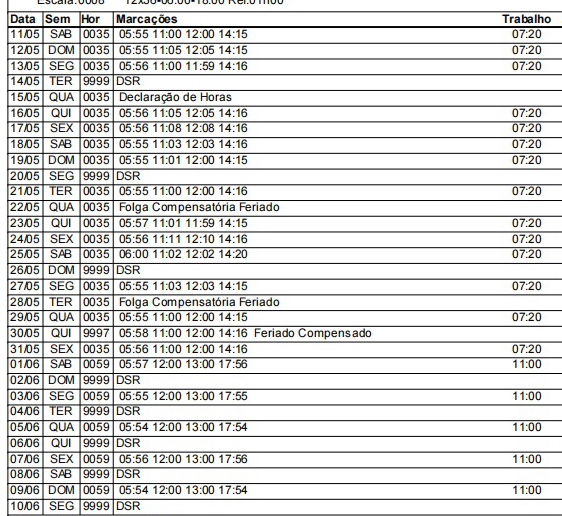

In [19]:
extracted_tables[0]['image']

In [20]:
args_dict =  {
    'image_dir': '../images', 
    'words_dir': None, 
    'out_dir': '../results', 
    'mode': 'extract', 
    'structure_config_path': 'structure_config.json', 
    'structure_model_path': '../weights/pubtables1m_structure_detr_r18.pth', 
    'detection_config_path': 'detection_config.json', 
    'detection_model_path': '../weights/pubtables1m_detection_detr_r18.pth', 
    'detection_device': 'cpu', 
    'structure_device': 'cpu', 
    'crops': False, 
    'objects': True, 
    'cells': False, 
    'html': False, 
    'csv': False, 
    'verbose': False, 
    'visualize': True, 
    'crop_padding': 20
}

args = types.SimpleNamespace(**args_dict)


for table_idx, extracted_table in enumerate(extracted_tables):
    for key, val in extracted_table.items():
        output_result(key, val, 
                        args,
                        extracted_table['image'],
                        img_path.replace('.jpg', '_{}.jpg'.format(table_idx)).replace('../images', '../results')
                    )

In [21]:
import pandas as pd

result_path = img_path.replace('.jpg', '_0_0.csv').replace('../images', '../results')

df = pd.read_csv(result_path)
df

,Data 105,Sem SAB,0035,Marcaçõcs 05.55 1.00 12.00 14.15,Trabalho 07.20
0,205,DOM,0035,05.55 1.05 12.05 14.15,07.20
1,NaN,NaN,0035,05.56 1.00 1.59 14.16,07.20
2,NaN,NaN,9999,NaN,NaN
3,NaN,NaN,0035,Declaração de Foras,NaN
4,NaN,NaN,0035,05.56 1.05 12.05 14.16,07.20
5,NaN,NaN,0o35,05.56 1.08 12.08 14.16,07.20
6,NaN,NaN,0035,05.55 1.03 12.03 14.16,07.20
7,NaN,NaN,0035,05.55 1.01 12.00 14.15,07.20
8,NaN,NaN,9999,NaN,NaN
9,NaN,NaN,0035,05.55 1:00 12.00 14.16,07.20
